<a href="https://colab.research.google.com/github/TietNguyenHoangTanDat/AI-SangT5/blob/main/DC_MOTOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=81ce014e59fd3902ef2c74bd29bfc1c745c26dae7d3f43227b5e1f27d5c20cd0
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


<ipython-input-4-c47b75075bf0>:55: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
<ipython-input-4-c47b75075bf0>:56: UserWarning: The following kwargs were not used by contour: 'offsert', 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'x', offsert = 11, cmap = 'viridis', anpha = 0.5)
<ipython-input-4-c47b75075bf0>:57: UserWarning: The following kwargs were not used by contour: 'offsert', 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'y', offsert = 11, cmap = 'viridis', anpha = 0.5)


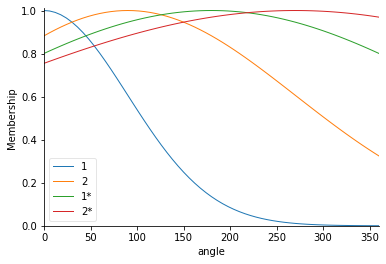

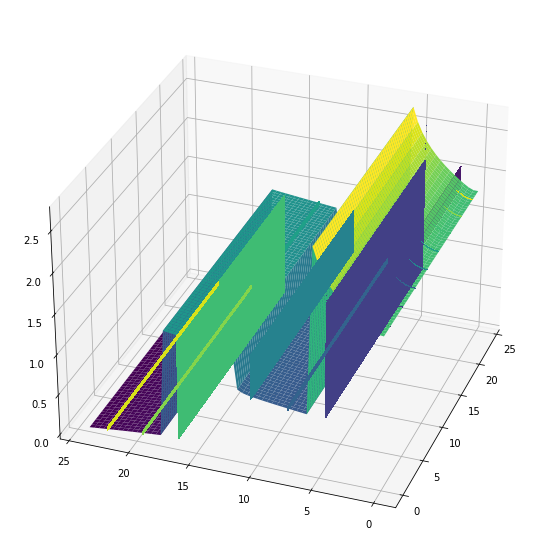

In [4]:
from numpy.lib.nanfunctions import nanmedian
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from skfuzzy.control.visualization import plt
from networkx.algorithms.bipartite import projection
from networkx import attr_sparse_matrix

universe = np.linspace(0,360,61) #goc quay cua dong co DC
universe1 = np.linspace(0,24,61) #nguon dien 24v chay vao lam quay roto
#input
angle=ctrl.Antecedent(universe,'angle') #goc quay
d_angle=ctrl.Antecedent(universe,'d_angle') #dao ham cua goc quay (sai so)
#output
v=ctrl.Consequent(universe1,'v') #toc do cua roto khi co dong dien di qua

angle['1'] = fuzz.gaussmf(angle.universe,0,90)
angle['2'] = fuzz.gaussmf(angle.universe,90,180)
angle['1*'] = fuzz.gaussmf(angle.universe,180,270)
angle['2*'] = fuzz.gaussmf(angle.universe,270,360)

d_angle['1'] = fuzz.gaussmf(d_angle.universe,0,2)
d_angle['2'] = fuzz.gaussmf(d_angle.universe,0,1)
d_angle['1*'] = fuzz.gaussmf(d_angle.universe,0,1)
d_angle['2*'] = fuzz.gaussmf(d_angle.universe,0,1)

v['1'] = fuzz.gaussmf(angle.universe,0,6)
v['2'] = fuzz.gaussmf(angle.universe,6,12)
v['1*'] = fuzz.gaussmf(angle.universe,12,18)
v['2*'] = fuzz.gaussmf(angle.universe,18,24)

angle.view()

rule1 = ctrl.Rule(angle['1']&d_angle['1'], v['1'])
rule2 = ctrl.Rule(angle['2']&d_angle['2'], v['2'])
rule3 = ctrl.Rule(angle['1*']&d_angle['1*'], v['1*'])
rule4 = ctrl.Rule(angle['2*']&d_angle['2*'], v['2*'])

system = ctrl.ControlSystem(rules = [rule1, rule2, rule3, rule4])
sim = ctrl.ControlSystemSimulation(system, flush_after_run = 61*61+1)
upsampled = np.linspace(0,24,61)
x,y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)
for i in range(61):
  for j in range(61):
    sim.input['angle'] = x[i,j]
    sim.input['d_angle'] = y[i,j]
    sim.compute()
    z[i,j] = sim.output['v']

# Ve surface, do thi cua ham va cac bien dau vao, be mat dieu khien
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection = '3d')
suf = ax.plot_surface(x,y,z, rstride = 1, cstride = 1, cmap = 'viridis', linewidth = 0.4, antialiased = True)
cset = ax.contourf(x,y,z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x,y,z, zdir = 'x', offsert = 11, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x,y,z, zdir = 'y', offsert = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(30,200)